In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
base_url = !pwd
base_url = base_url[0]
#To be adapted depending on the project directory path
path_url  = os.path.normpath(os.path.join(base_url, '..', '..', 'TransformedData'))
path_url

'/home/romainj/code/RomainJupille/wagon/Projet_batteries/TransformedData'

# Charge capacity data

'Charge capacity' data is the target in both model one and model two

## Overview

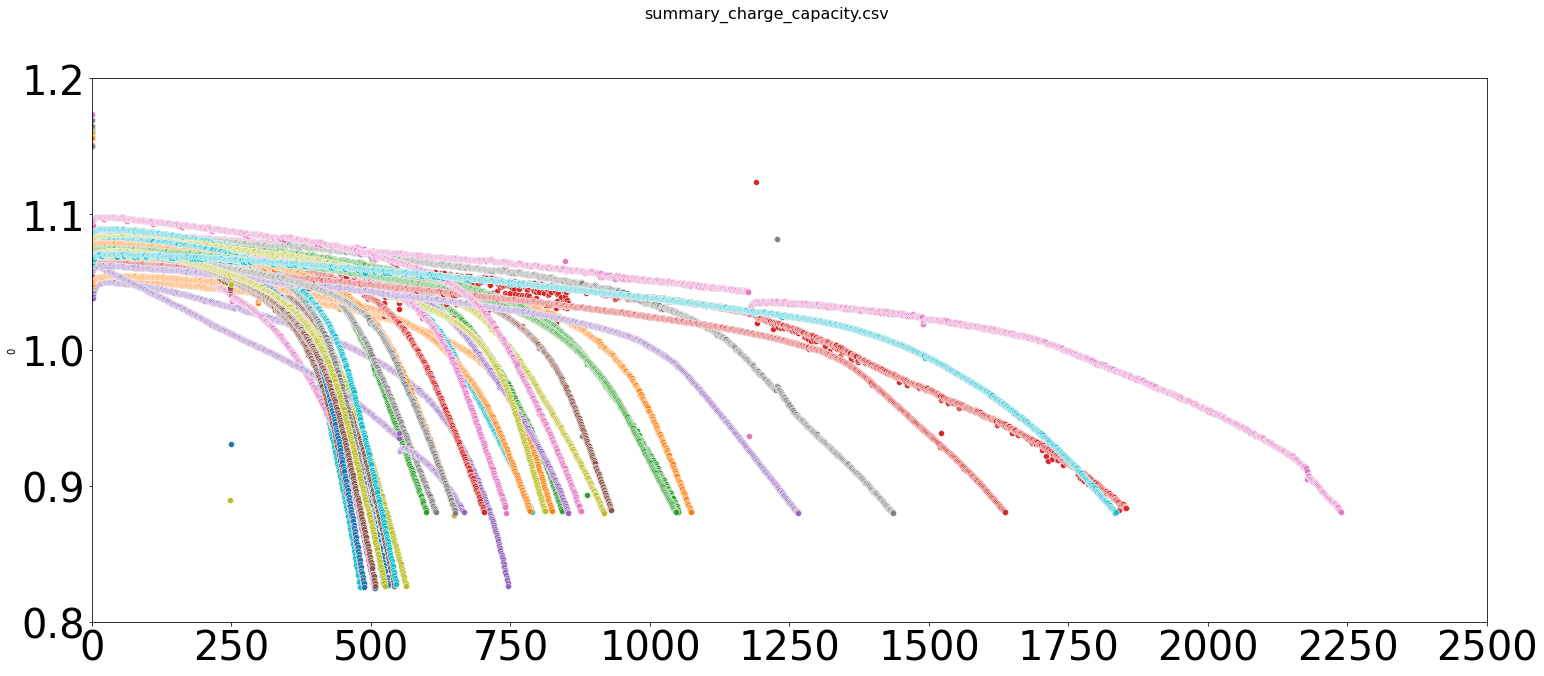

In [3]:
#First general graphic display all the 'discharge capa from batteries from min_index to max_index 
min_index = 0
max_index = 40


file_name = "summary_charge_capacity.csv"
path_file = os.path.join(path_url,file_name)
df = pd.read_csv(path_file).drop(columns = 'barcode')
df.fillna(0, inplace = True)
fig, axs = plt.subplots(1,1, figsize=(25,10))
fig.suptitle(file_name, fontsize=16)
for i in range(min_index,max_index):
    sns.scatterplot(y = df.iloc[i,:], x =df.columns, ax = axs)
axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.tick_params(axis='both', which='major', labelsize=40);

## Model 1 illustration: Binary classification of batteries depending on the number of life-cycles

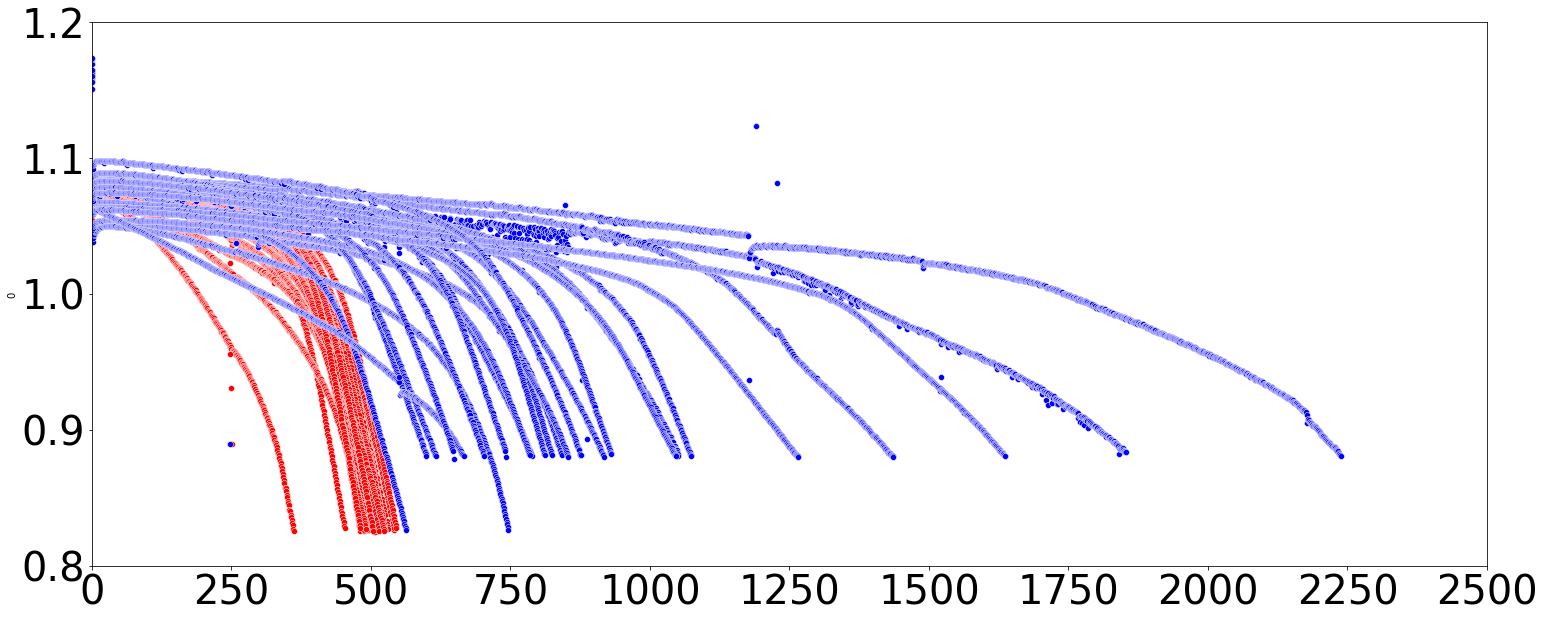

In [4]:
#Display batteries that reached the target number of cycles in blue
#and the other in red
target = 550
min_index = 0
max_index = 25



file_name = "summary_charge_capacity.csv"
path_file = os.path.join(path_url,file_name)
df = pd.read_csv(path_file).drop(columns = 'barcode')
df = df[df.iloc[:,target].isna() == True]
df.fillna(0, inplace = True)
fig, axs = plt.subplots(1,1, figsize=(25,10))
for i in range(min_index,max_index):
    sns.scatterplot(y = df.iloc[i,:], x =df.columns, ax = axs, color = 'red')

df = pd.read_csv(path_file).drop(columns = 'barcode')
df = df[df.iloc[:,target].isna() == False]
df.fillna(0, inplace = True)
for i in range(min_index,max_index):
    sns.scatterplot(y = df.iloc[i,:], x =df.columns, ax = axs, color = 'blue' )                    

axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.tick_params(axis='both', which='major', labelsize=40);

## Model 2 illustration: prediction of the number of life-cycles left to the battery (at a random moment of the battery life)

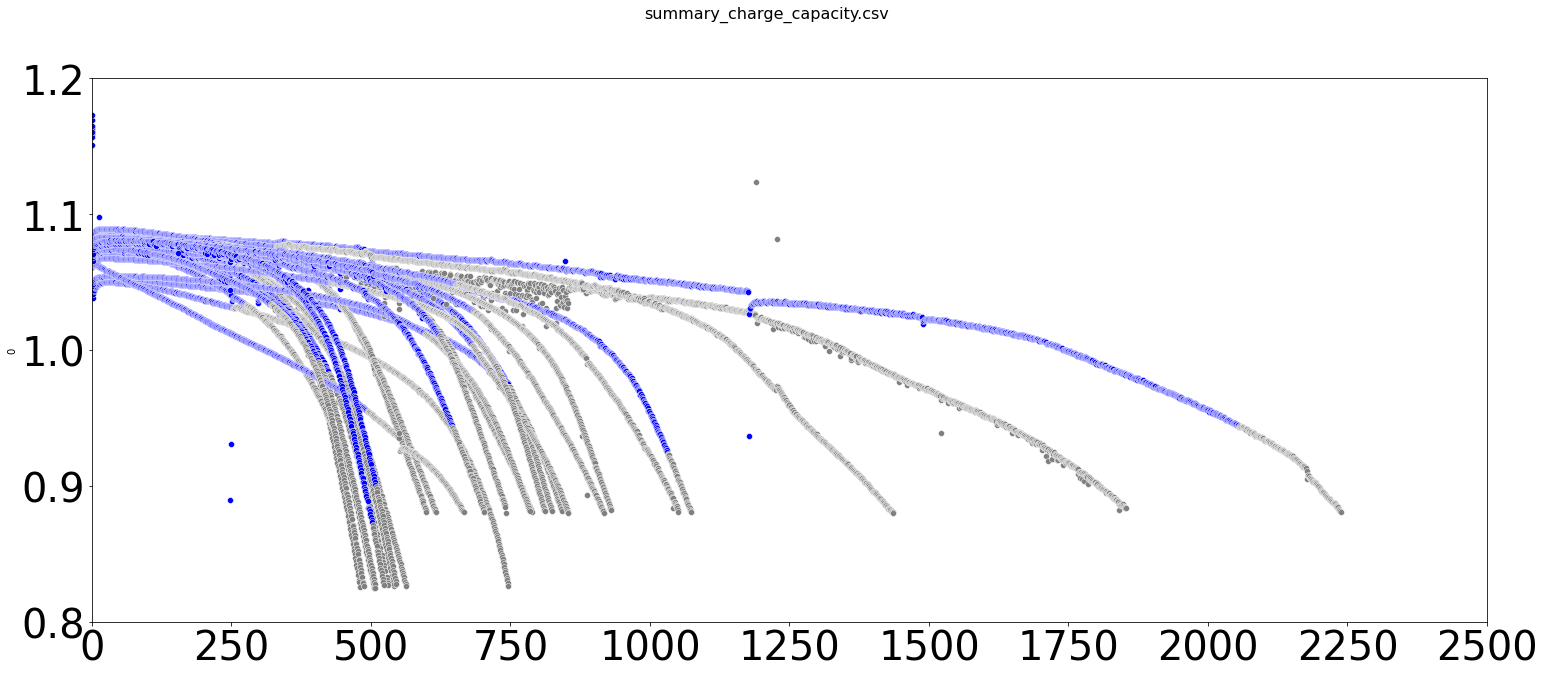

In [5]:
#Display in blue the data used by the model (the past) and in grey the prediction
# the prediction is only the number of cycles left (not the shape of the curve)
#The separation between blue and grey (past data and data to predict) is choosen randomly
min_index = 0
max_index = 25


file_name = "summary_charge_capacity.csv"
path_file = os.path.join(path_url,file_name)
df = pd.read_csv(path_file).drop(columns = 'barcode')
fig, axs = plt.subplots(1,1, figsize=(25,10))
fig.suptitle(file_name, fontsize=16)
for i in range(0,30):
    len = df.iloc[i,:].isna().sum()
    df.iloc[i,:].fillna(0, inplace = True)
    try:
        n = np.random.randint(200,3000 - len)
        sns.scatterplot(y = df.iloc[i,:n], x =np.arange(0,n), ax = axs, color = 'blue')
        sns.scatterplot(y = df.iloc[i,n:], x =np.arange(n,3000), ax = axs, color = 'grey')
    except:
        pass
axs.set_ylim(0.8,1.2)
axs.set_yticks([0.8,0.9,1.0,1.1,1.2])
axs.set_xlim(0,2500)
axs.set_xticks(range(0,2501,250))
axs.tick_params(axis='both', which='major', labelsize=40)

# Display of all other features

In [6]:
def print_a_feature(name = "summary_charge_capacity.csv", a = 2, b = 3, y_lim = False):
    file_name = name
    path_file = os.path.join(path_url,file_name)
    df = pd.read_csv(path_file).drop(columns = 'barcode')
    df.fillna(0, inplace = True)
    a=2
    b=3
    step = int((df.shape[0] / (a*b)))
    fig, axs = plt.subplots(a,b, figsize=(25,10))
    fig.suptitle(file_name, fontsize=16)
    
    
    for i in range(a*b):
        for j in range(step * i, step *(i + 1)):
            sns.scatterplot(y = df.iloc[j,:], x =df.columns, ax = axs[i//b,i%b] )
        if not y_lim == False:
            axs[i//b,i%b].set_ylim(y_lim[0],y_lim[1])
        axs[i//b,i%b].set_xlim(0,2500)
        axs[i//b,i%b].set_xticks(range(0,2501,250));

In [7]:
file = [
'summary_discharge_capacity.csv',
'summary_discharge_energy.csv',         
'summary_energy_efficiency.csv',          
'summary_energy_throughput.csv',                                        
'summary_temperature_average.csv',
'summary_charge_capacity.csv',
'summary_charge_duration.csv',
'summary_charge_throughput.csv',
'summary_charge_energy.csv',
'summary_temperature_average.csv',
'summary_temperature_minimum.csv',
'summary_temperature_maximum.csv',
'summary_time_temperature_integrated.csv',
'summary_dc_internal_resistance.csv'
]

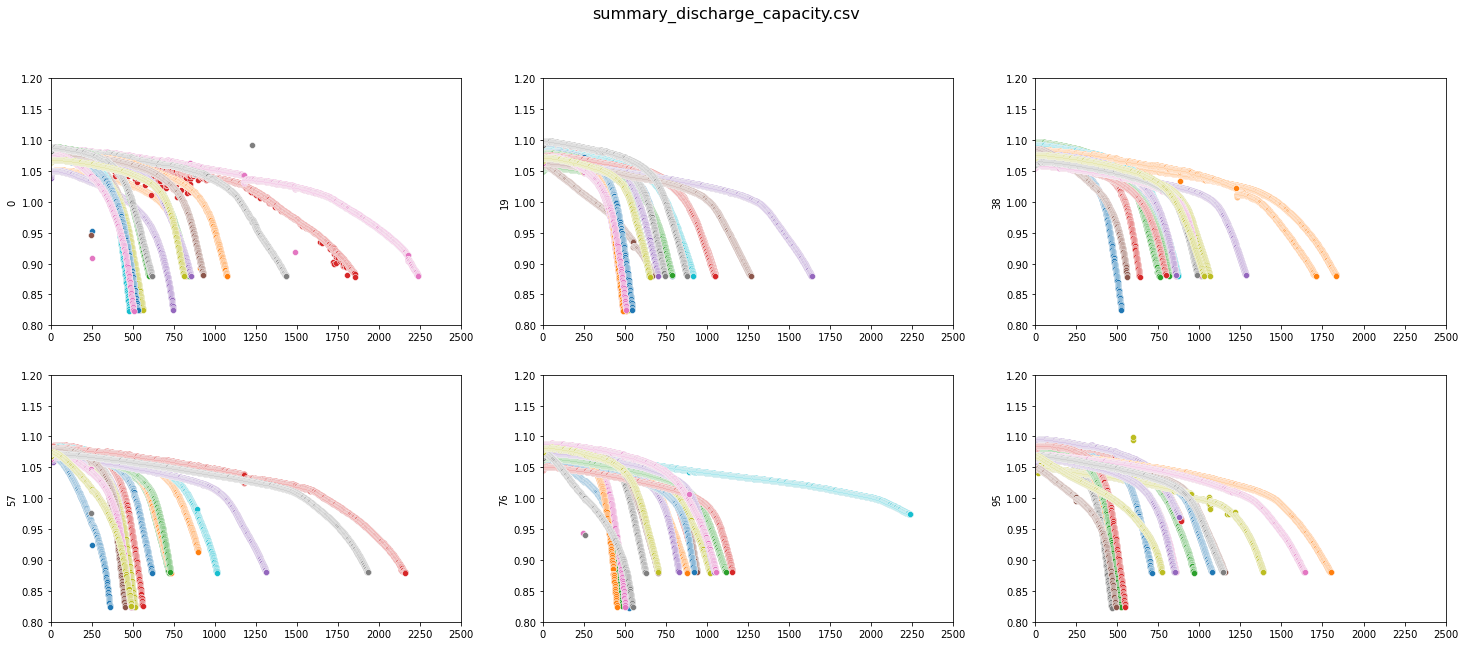

In [8]:
print_a_feature(file[0], 2, 3, [0.8,1.2])

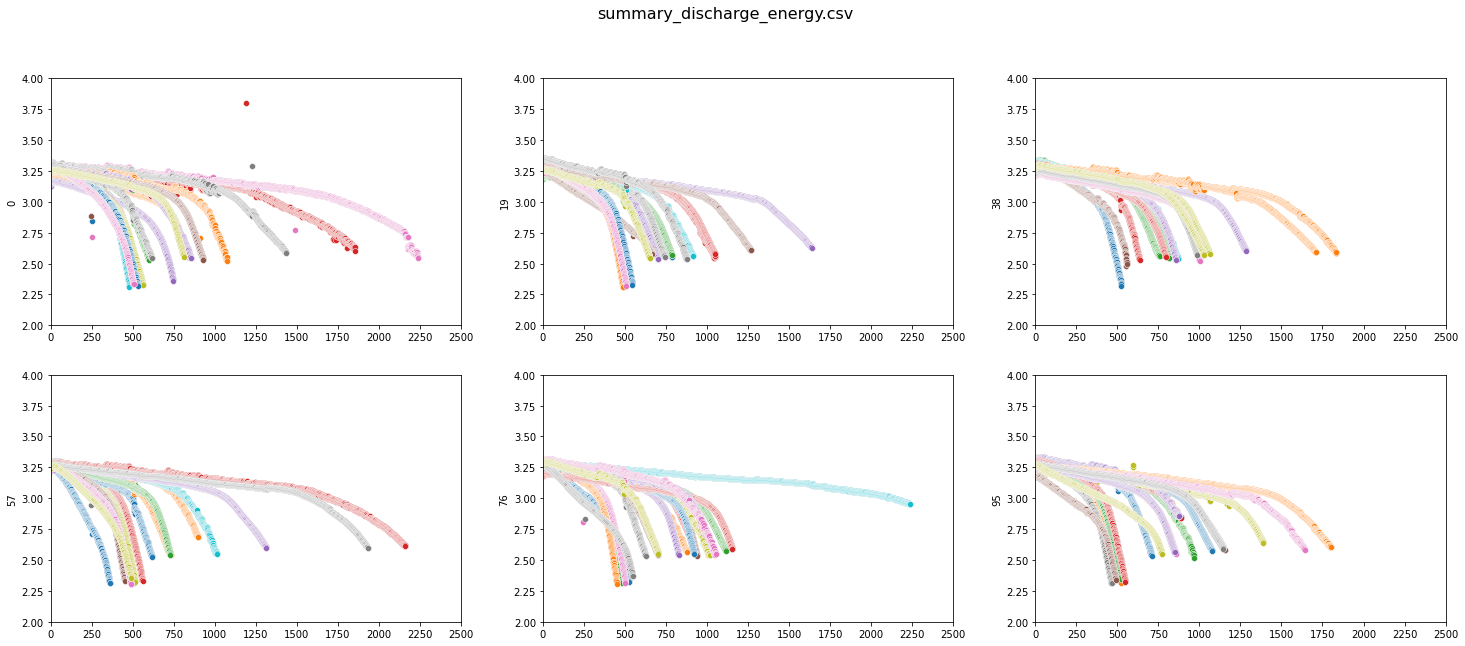

In [9]:
print_a_feature(file[1], 2, 3, [2,4])

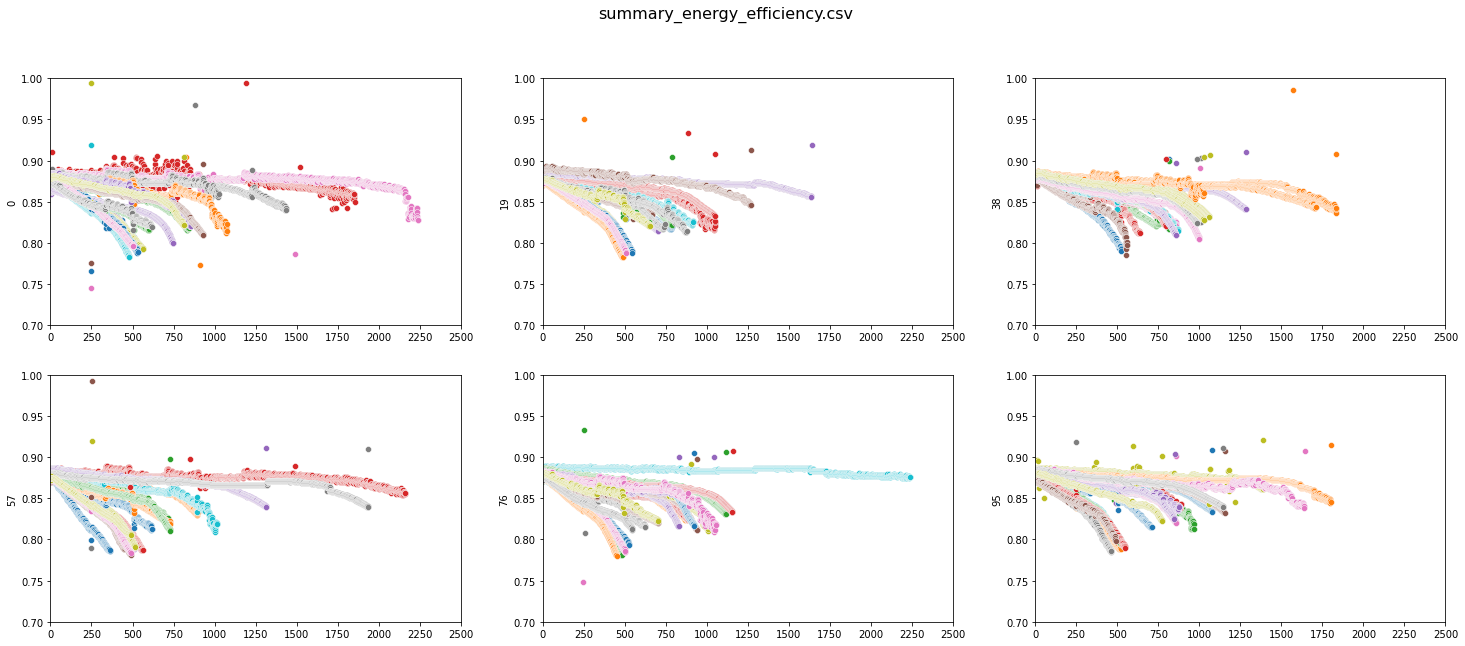

In [10]:
print_a_feature(file[2], 2, 3, [0.7,1])

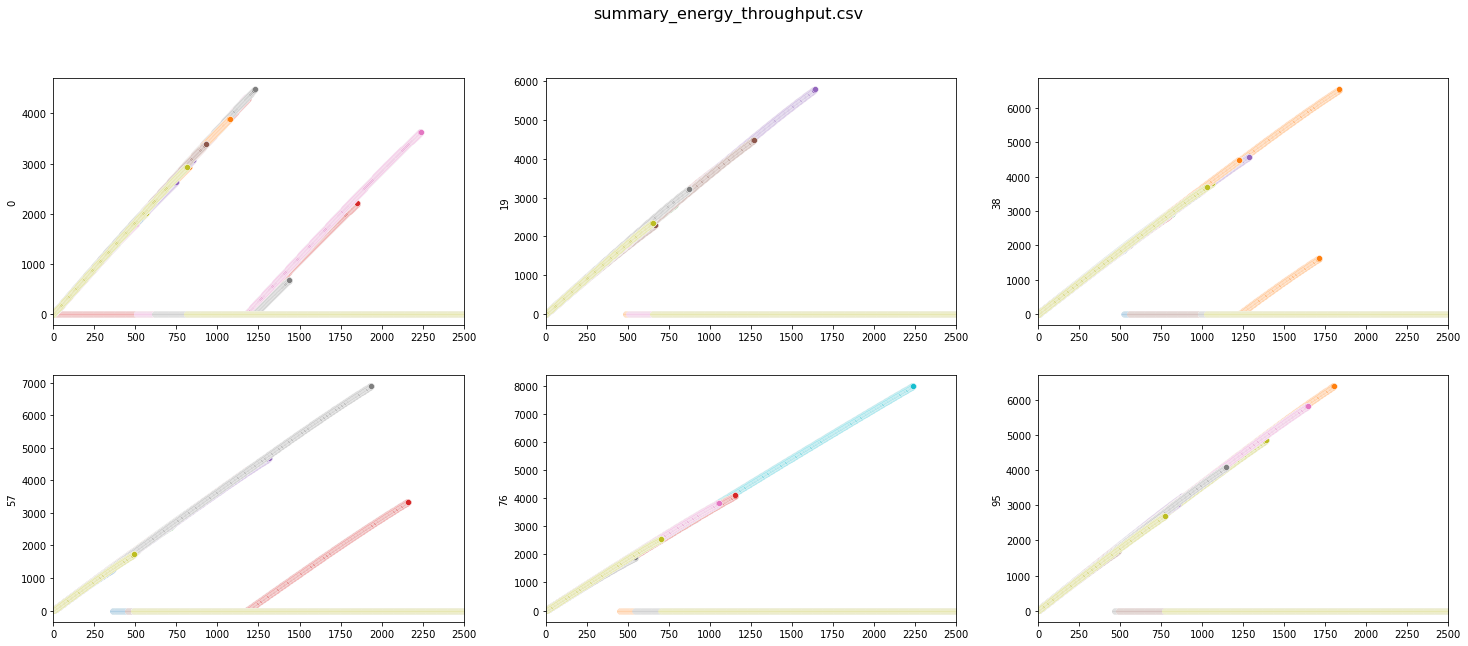

In [11]:
print_a_feature(file[3], 2, 3)

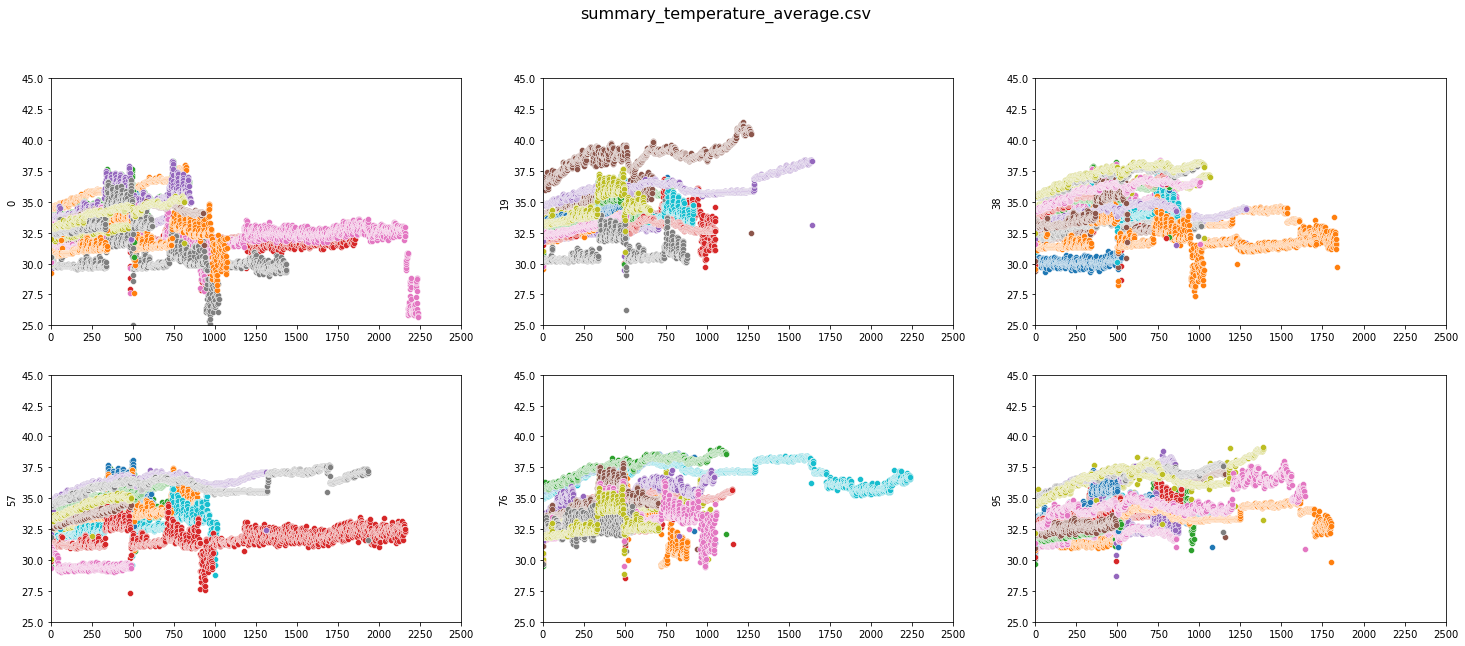

In [12]:
print_a_feature(file[4], 2, 3, [25, 45])

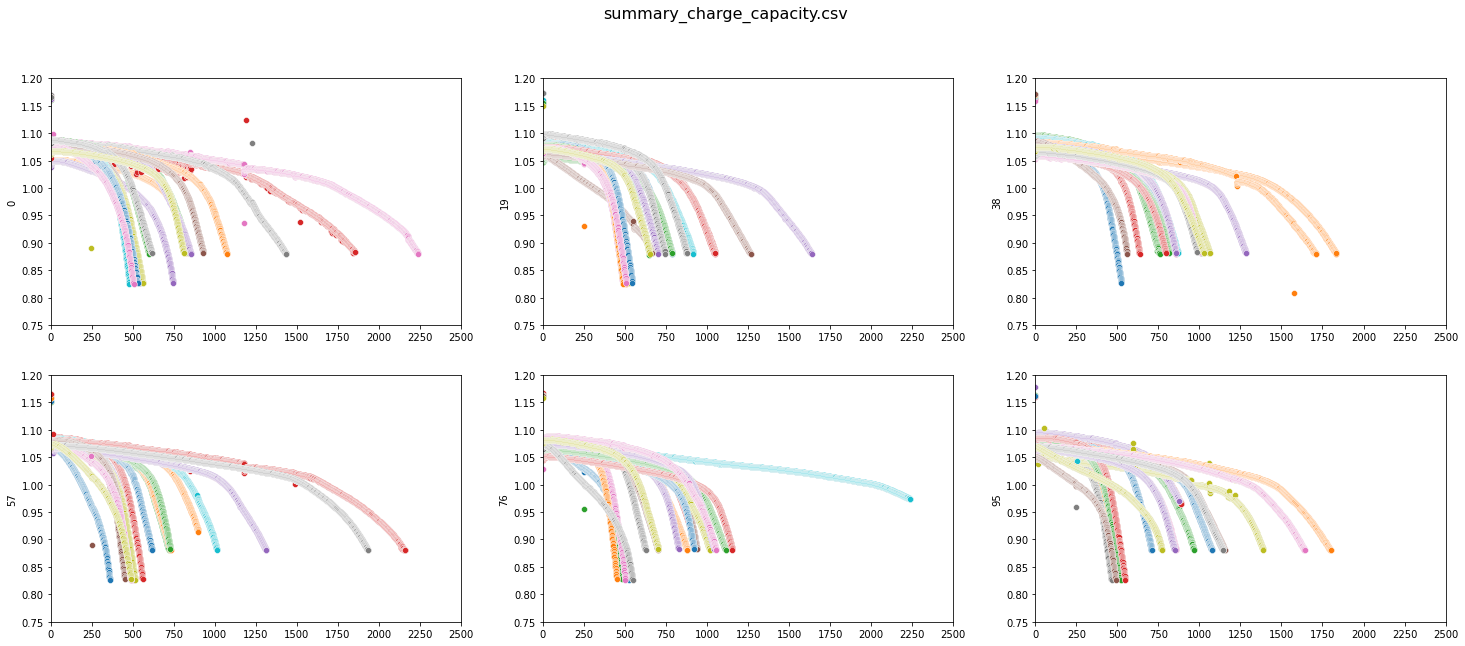

In [13]:
print_a_feature(file[5], 2, 3, [0.75, 1.2])

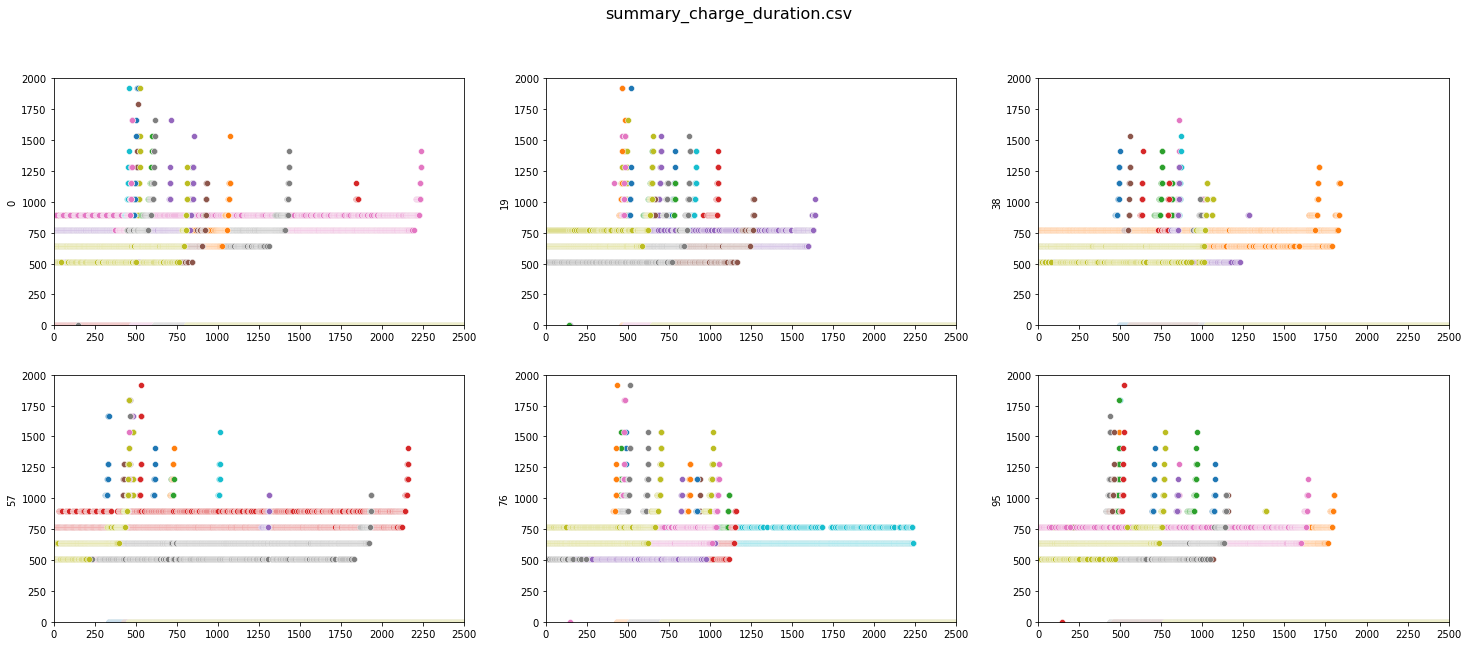

In [14]:
print_a_feature(file[6], 2, 3, [0,2000])

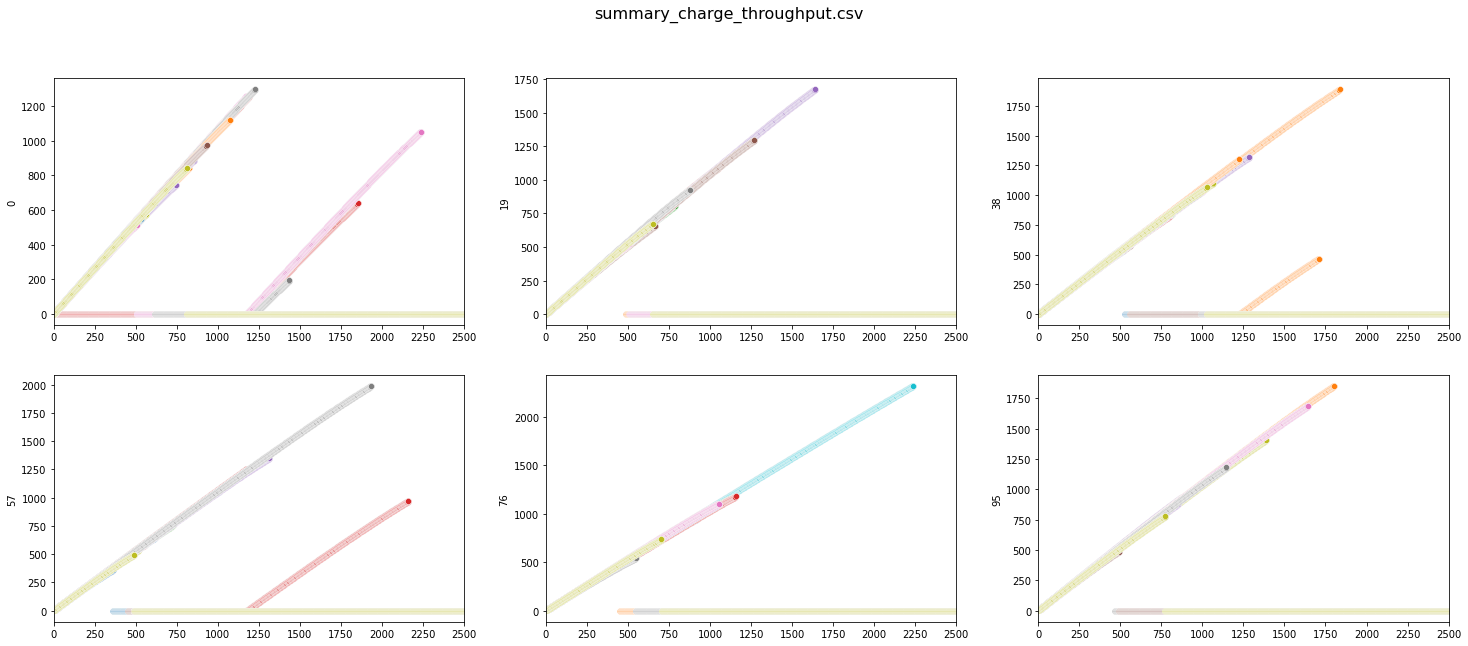

In [15]:
print_a_feature(file[7], 2, 3)

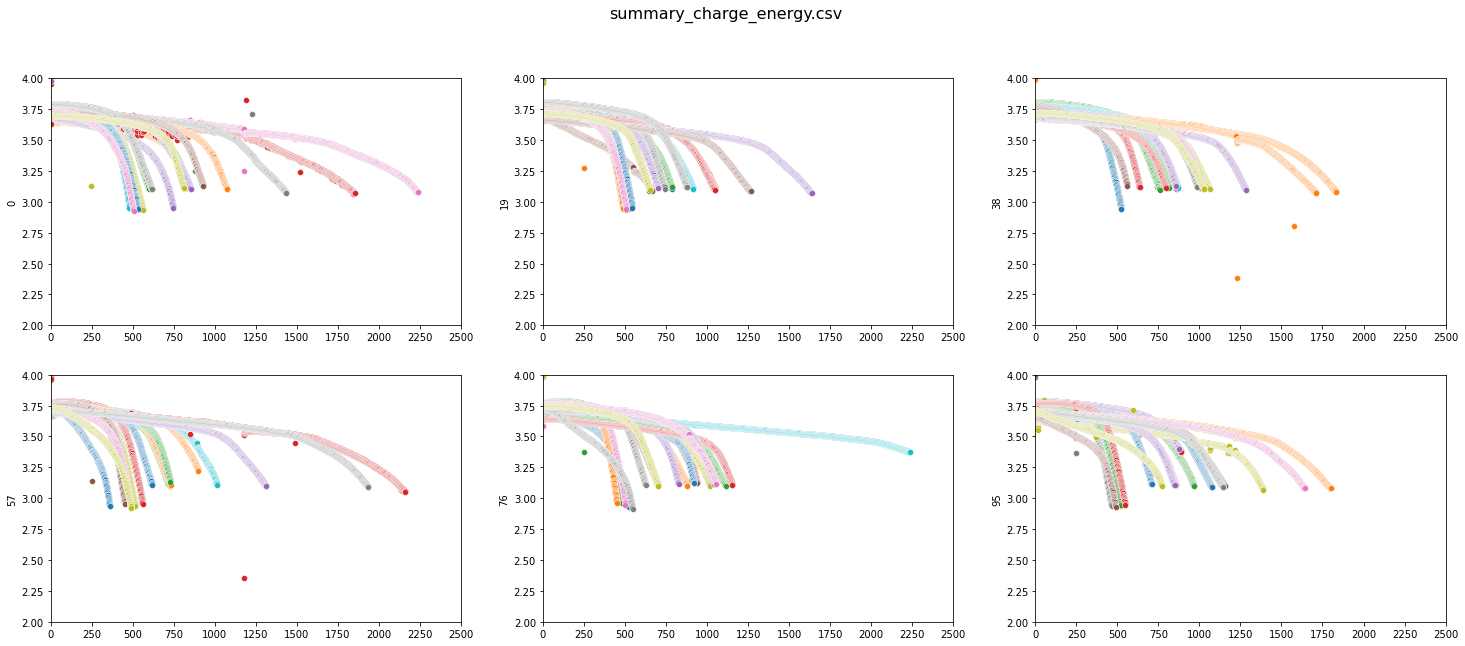

In [16]:
print_a_feature(file[8], 2, 3, [2,4])

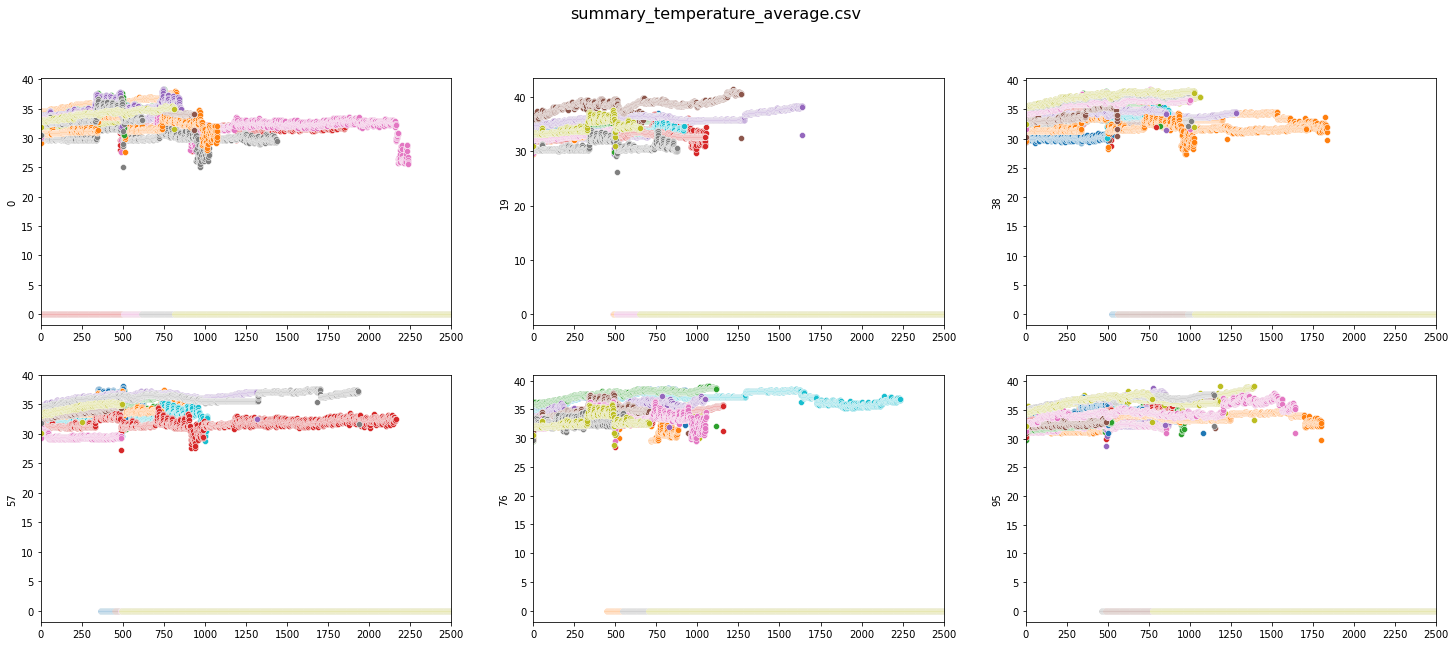

In [17]:
print_a_feature(file[9], 2, 3)

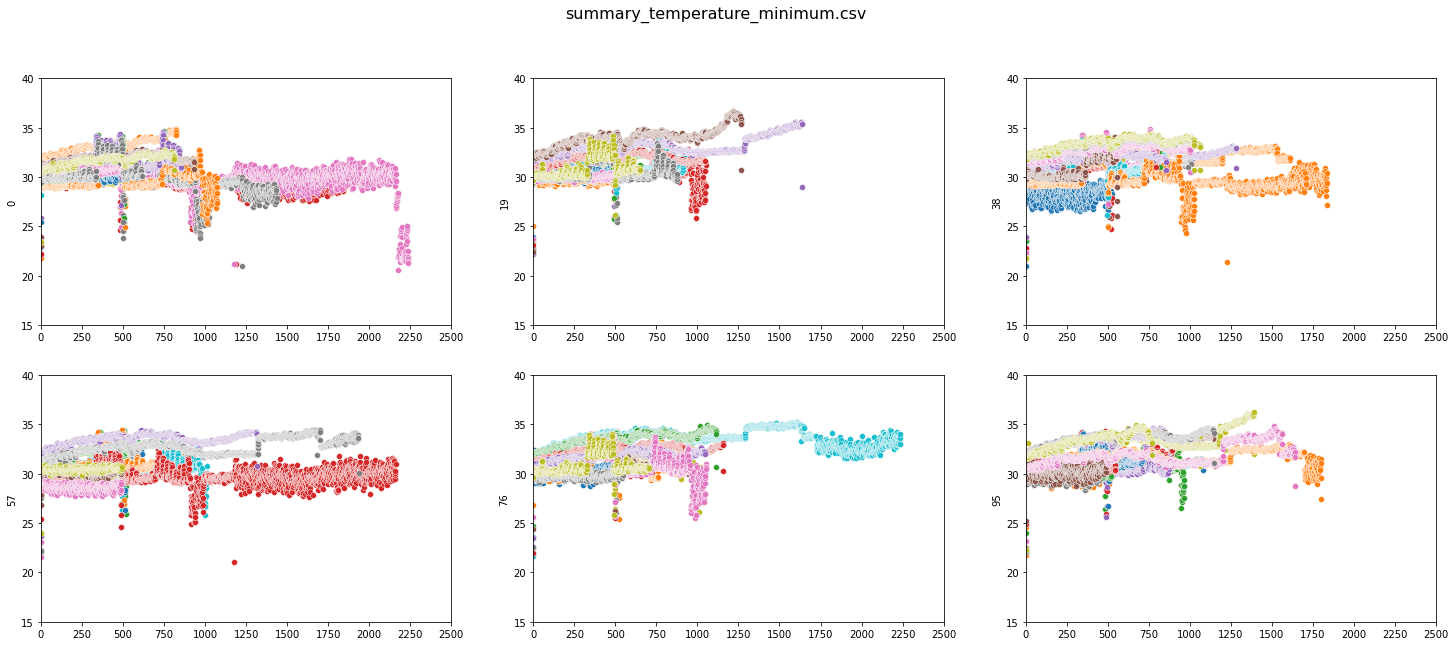

In [18]:
print_a_feature(file[10], 2, 3, [15, 40])

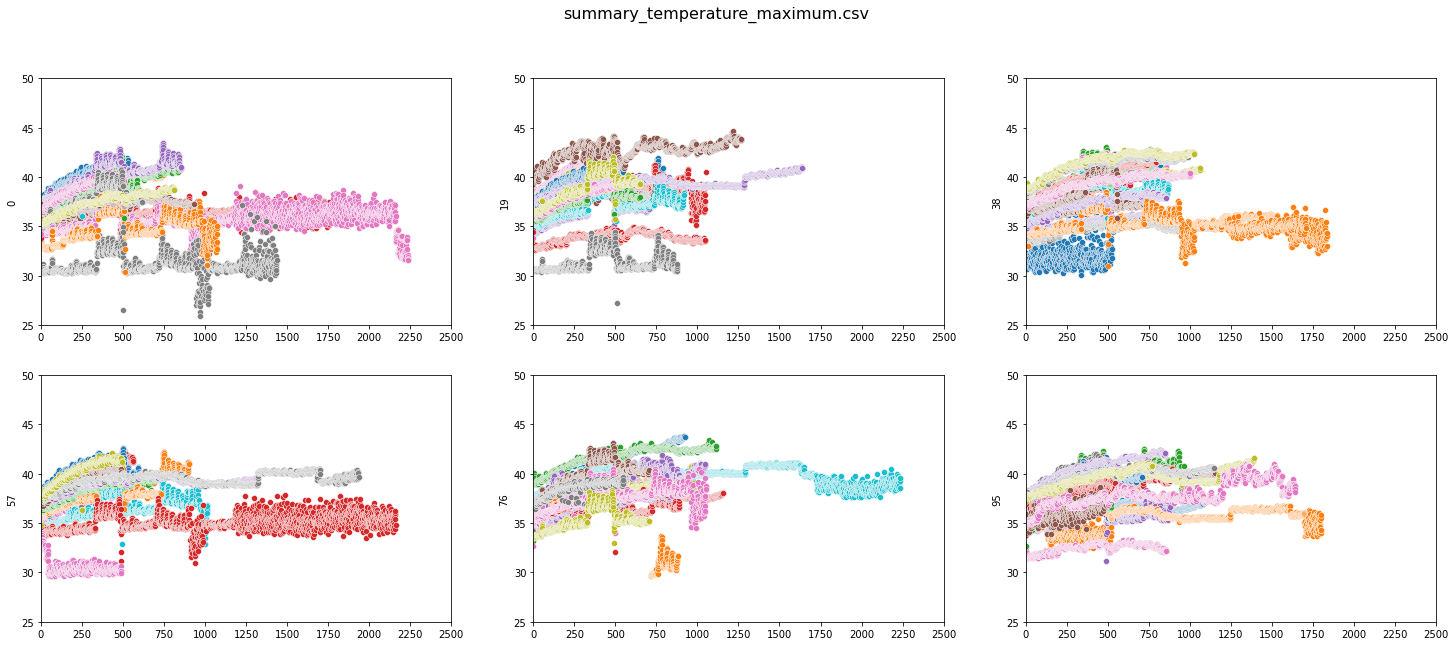

In [19]:
print_a_feature(file[11], 2, 3, [25, 50])

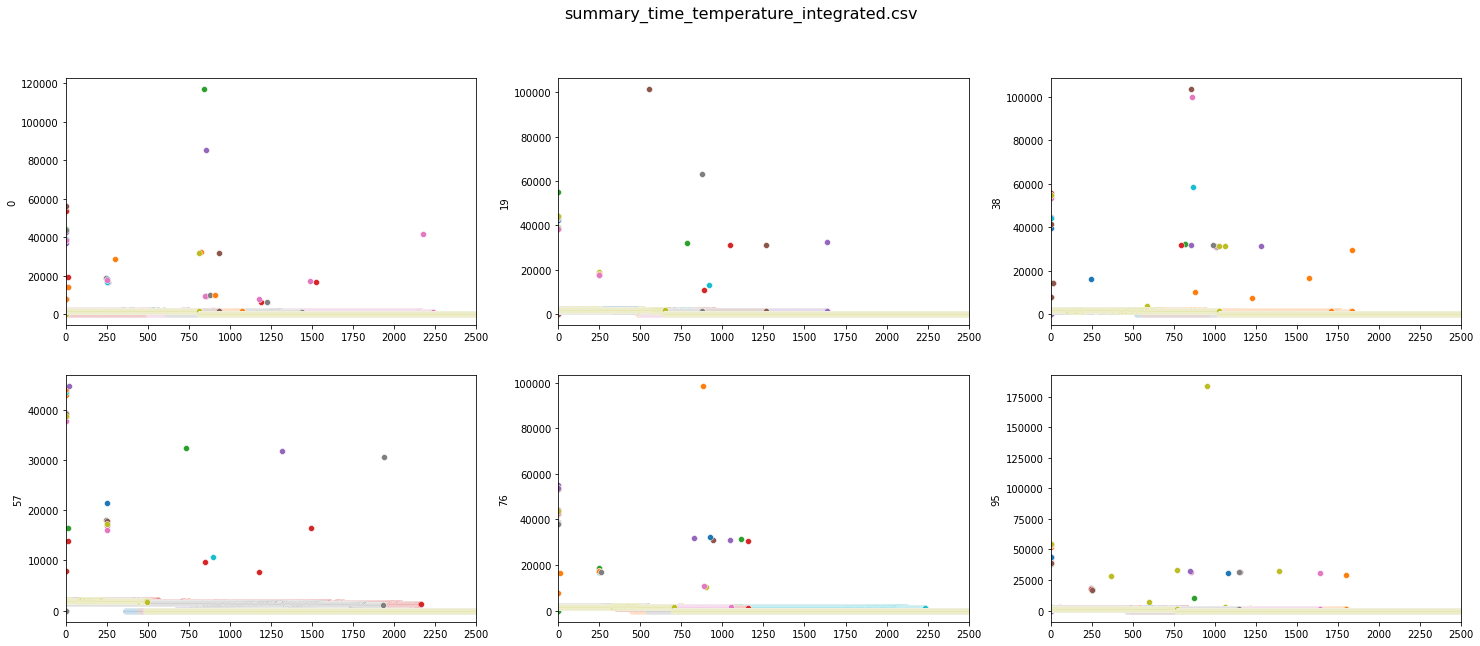

In [20]:
print_a_feature(file[12], 2, 3)

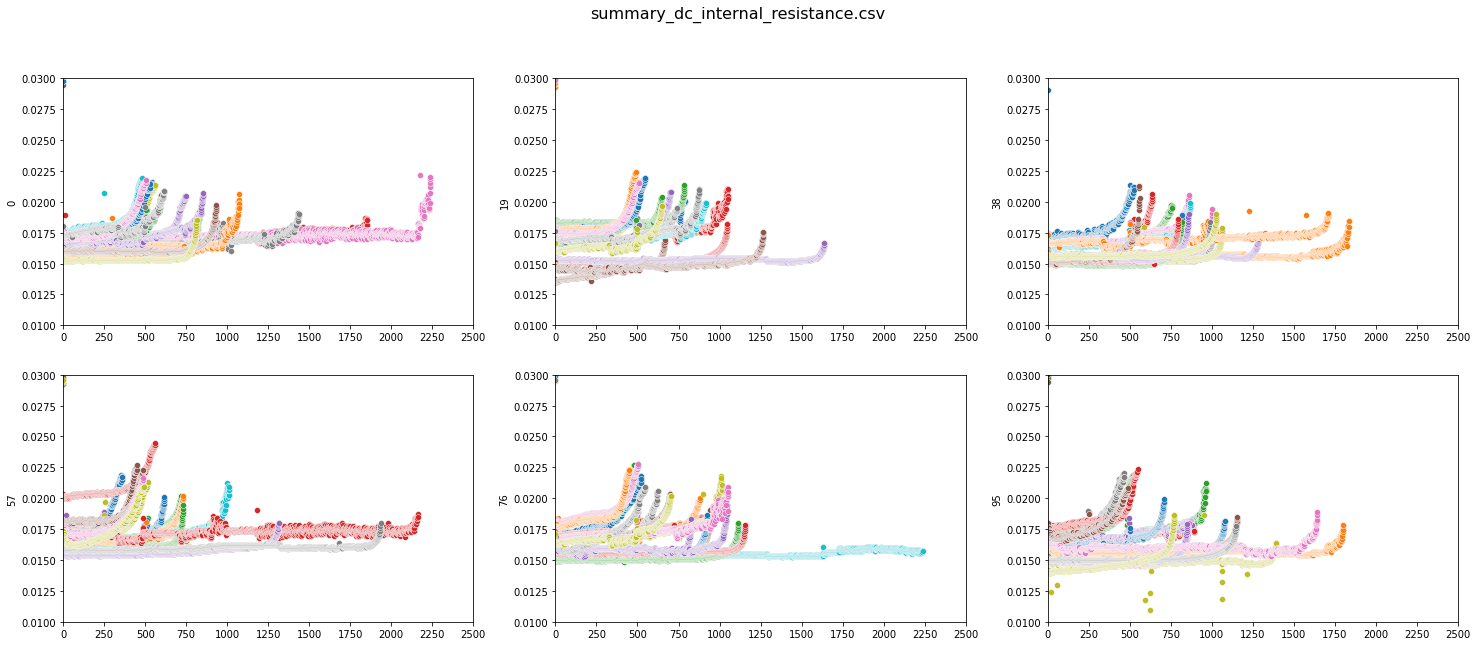

In [21]:
print_a_feature(file[13], 2, 3, [0.01,0.03])